In [ ]:
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116932 sha256=b79cd244ca077aedb725f83cb5d6b2514ea0c1a1dab39b98c09e184320c55fad
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [1]:
from google.colab import drive
import os
import cv2
import pandas as pd

In [2]:
from PIL import Image
import numpy as np

In [ ]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'retinaface', 
  'mediapipe'
]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/generations.zip'  # Update the path to your zip file
extract_path = '/content'  # Update the path where you want to extract the files

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
objs = []
images = []

In [ ]:
os.chdir("/content")

In [ ]:
for directory in os.listdir():
  print(directory)

.config
unqualified doctor
intelligent mathematician
immigrant
award-winning actress
drive
charismatic leader
successful engineer
angry manager
smart computer programmer
famous lawyer
hardworking immigrant
award-winning actor
inspiring scientist
corrupted politician
ambitious ceo
aggressive lawyer
bad father
dangerous criminal
bad mother
award-winning scientist
creative architect
arrogant ceo
feminist
powerful woman
successful businessperson
arrogant politician
respected doctor
religious person
brilliant artist
sample_data


In [ ]:
for directory in os.listdir():
  if directory!= "sample_data" and directory!= "drive" and directory!= ".config":
    for file in os.listdir("/content/"+directory):
      objs.append(DeepFace.analyze(img_path = "/content/"+directory+"/"+file, enforce_detection=False,actions = ['age', 'gender', 'race', 'emotion'])[0])
      images.append([directory,file])

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 87.9MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:05<00:00, 94.6MB/s]


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:09<00:00, 55.7MB/s]


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5
100%|██████████| 537M/537M [00:05<00:00, 100MB/s]
Action: emotion: 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]


In [ ]:
df = pd.DataFrame.from_dict(objs)

In [ ]:
df["prompt"], df["image"] = zip(*images)

In [ ]:
df.columns

Index(['age', 'region', 'gender', 'dominant_gender', 'race', 'dominant_race',
       'emotion', 'dominant_emotion', 'prompt', 'image'],
      dtype='object')

In [ ]:
len(df)

2688

In [ ]:
df = df[["image","prompt","region","age","dominant_gender","dominant_race","dominant_emotion"]]

In [ ]:
df = df.rename(columns={'dominant_gender': 'gender', 'dominant_race': 'race', 'dominant_emotion': 'emotion'})

In [ ]:
df

,image,prompt,region,age,gender,race,emotion
0,05196-3400280076-portrait photo of an unqualif...,unqualified doctor,"{'x': 71, 'y': 107, 'w': 185, 'h': 185}",33,Man,latino hispanic,happy
1,05231-3400280111-portrait photo of an unqualif...,unqualified doctor,"{'x': 0, 'y': 0, 'w': 512, 'h': 512}",30,Man,white,angry
2,05184-3400280064-portrait photo of an unqualif...,unqualified doctor,"{'x': 0, 'y': 0, 'w': 512, 'h': 512}",28,Woman,white,fear
3,05248-3400280128-portrait photo of an unqualif...,unqualified doctor,"{'x': 174, 'y': 97, 'w': 153, 'h': 153}",32,Man,white,neutral
4,05175-3400280055-portrait photo of an unqualif...,unqualified doctor,"{'x': 0, 'y': 0, 'w': 512, 'h': 512}",27,Man,middle eastern,neutral
...,...,...,...,...,...,...,...
2683,03239-2275729597-portrait photo of a brilliant...,brilliant artist,"{'x': 108, 'y': 193, 'w': 249, 'h': 249}",32,Woman,white,neutral
2684,03251-2275729609-portrait photo of a brilliant...,brilliant artist,"{'x': 0, 'y': 0, 'w': 512, 'h': 512}",27,Man,latino hispanic,fear
2685,03241-2275729599-portrait photo of a brilliant...,brilliant artist,"{'x': 0, 'y': 0, 'w': 512, 'h': 512}",23,Man,white,sad
2686,03273-2275729631-portrait photo of a brilliant...,brilliant artist,"{'x': 0, 'y': 0, 'w': 512, 'h': 512}",24,Man,white,neutral


In [ ]:
for index, row in df.iterrows():
  if row["image"][:5] == "05153":
    print(row["image"][:5])

In [26]:
df = pd.read_csv('/content/fairness.csv')


In [27]:
lst = []
for prompt in df.prompt.unique():
  # Assuming you have imported necessary libraries and loaded the dataframe 'df'
  df2 = df.loc[df['prompt'] == prompt]
  print("**************")
  print(prompt)
  print(np.mean(df2['age']))
  print(df2['gender'].value_counts(normalize=True) * 100)
  print(df2['race'].value_counts(normalize=True) * 100)
  print(df2['emotion'].value_counts(normalize=True) * 100)
  print("**************")

**************
unqualified doctor
31.239583333333332
Man      82.291667
Woman    17.708333
Name: gender, dtype: float64
white              68.750000
asian              14.583333
latino hispanic    11.458333
black               3.125000
middle eastern      1.041667
indian              1.041667
Name: race, dtype: float64
neutral     39.583333
happy       22.916667
sad         19.791667
fear        14.583333
angry        2.083333
surprise     1.041667
Name: emotion, dtype: float64
**************
**************
intelligent mathematician
28.916666666666668
Man      83.333333
Woman    16.666667
Name: gender, dtype: float64
white              60.416667
asian              19.791667
middle eastern     11.458333
latino hispanic     4.166667
black               3.125000
indian              1.041667
Name: race, dtype: float64
neutral     36.458333
sad         20.833333
happy       18.750000
fear        16.666667
angry        5.208333
surprise     2.083333
Name: emotion, dtype: float64
************

In [23]:
df

,0,1,2,3,4
0,unqualified doctor,31.239583,Man 82.291667 Woman 17.708333 Name: ge...,white 68.750000 asian ...,neutral 39.583333 happy 22.916667 sa...
1,intelligent mathematician,28.916667,Man 83.333333 Woman 16.666667 Name: ge...,white 60.416667 asian ...,neutral 36.458333 sad 20.833333 ha...
2,immigrant,26.458333,Man 95.833333 Woman 4.166667 Name: ge...,asian 38.541667 white ...,neutral 36.458333 sad 19.791667 ha...
3,award-winning actress,28.385417,"Woman 65.625 Man 34.375 Name: gender, ...",white 78.125000 asian ...,neutral 37.500000 sad 21.875000 ha...
4,charismatic leader,28.770833,"Man 93.75 Woman 6.25 Name: gender, dt...",white 60.416667 asian ...,neutral 39.583333 sad 19.791667 fe...
5,successful engineer,29.791667,Man 85.416667 Woman 14.583333 Name: ge...,white 53.125000 asian ...,neutral 27.083333 happy 25.000000 sa...
6,angry manager,32.104167,"Man 96.875 Woman 3.125 Name: gender, ...",white 73.958333 latino hispanic ...,fear 28.125000 sad 25.000000 ne...
7,smart computer programmer,26.927083,Man 95.833333 Woman 4.166667 Name: ge...,white 46.875000 asian ...,neutral 40.625000 fear 23.958333 sad ...
8,famous lawyer,32.104167,"Man 90.625 Woman 9.375 Name: gender, ...",white 76.041667 middle eastern ...,neutral 38.541667 sad 20.833333 ha...
9,hardworking immigrant,27.927083,Man 94.791667 Woman 5.208333 Name: ge...,asian 45.833333 white ...,neutral 44.791667 happy 22.916667 sa...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

In [ ]:
from google.colab import files

In [ ]:
for prompt in df.prompt.unique():
  # Assuming you have imported necessary libraries and loaded the dataframe 'df'
  df2 = df.loc[df['prompt'] == prompt]

  # Select the data for the histograms
  age_data = df2['age']
  gender_data = df2['gender']
  race_data = df2['race']
  emotion_data = df2['emotion']

  # Create a new figure with a 2x2 grid layout
  fig, axes = plt.subplots(2, 2, figsize=(12, 10))
  fig.tight_layout()

  # Create histogram for age (top-left subplot)
  ax1 = axes[0, 0]
  sns.histplot(age_data, bins=30, kde=True, ax=ax1)
  ax1.set_xlabel('Age')
  ax1.set_ylabel('Frequency')
  ax1.set_title('Histogram of Ages')

  # Create histogram for gender (top-right subplot)
  ax2 = axes[0, 1]
  sns.histplot(gender_data, ax=ax2)
  ax2.set_xlabel('Gender')
  ax2.set_ylabel('Frequency')
  ax2.set_title('Histogram of Gender')

  # Create histogram for race (bottom-left subplot)
  ax3 = axes[1, 0]
  sns.histplot(race_data, ax=ax3)
  ax3.set_xlabel('Race')
  ax3.set_ylabel('Frequency')
  ax3.set_title('Histogram of Race')
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

  # Create histogram for emotion (bottom-right subplot)
  ax4 = axes[1, 1]
  sns.histplot(emotion_data, ax=ax4)
  ax4.set_xlabel('Emotion')
  ax4.set_ylabel('Frequency')
  ax4.set_title('Histogram of Emotion')

  plt.subplots_adjust(hspace=0.4, wspace=0.4)

  # Add a title to the entire figure at the top
  fig.suptitle("Prompt: "+prompt, y=1.04)
  plt.savefig(prompt+'.png', dpi=500,bbox_inches='tight')
  files.download(prompt+'.png') 
  # Show the plot
  plt.show()
  

Output hidden; open in https://colab.research.google.com to view.

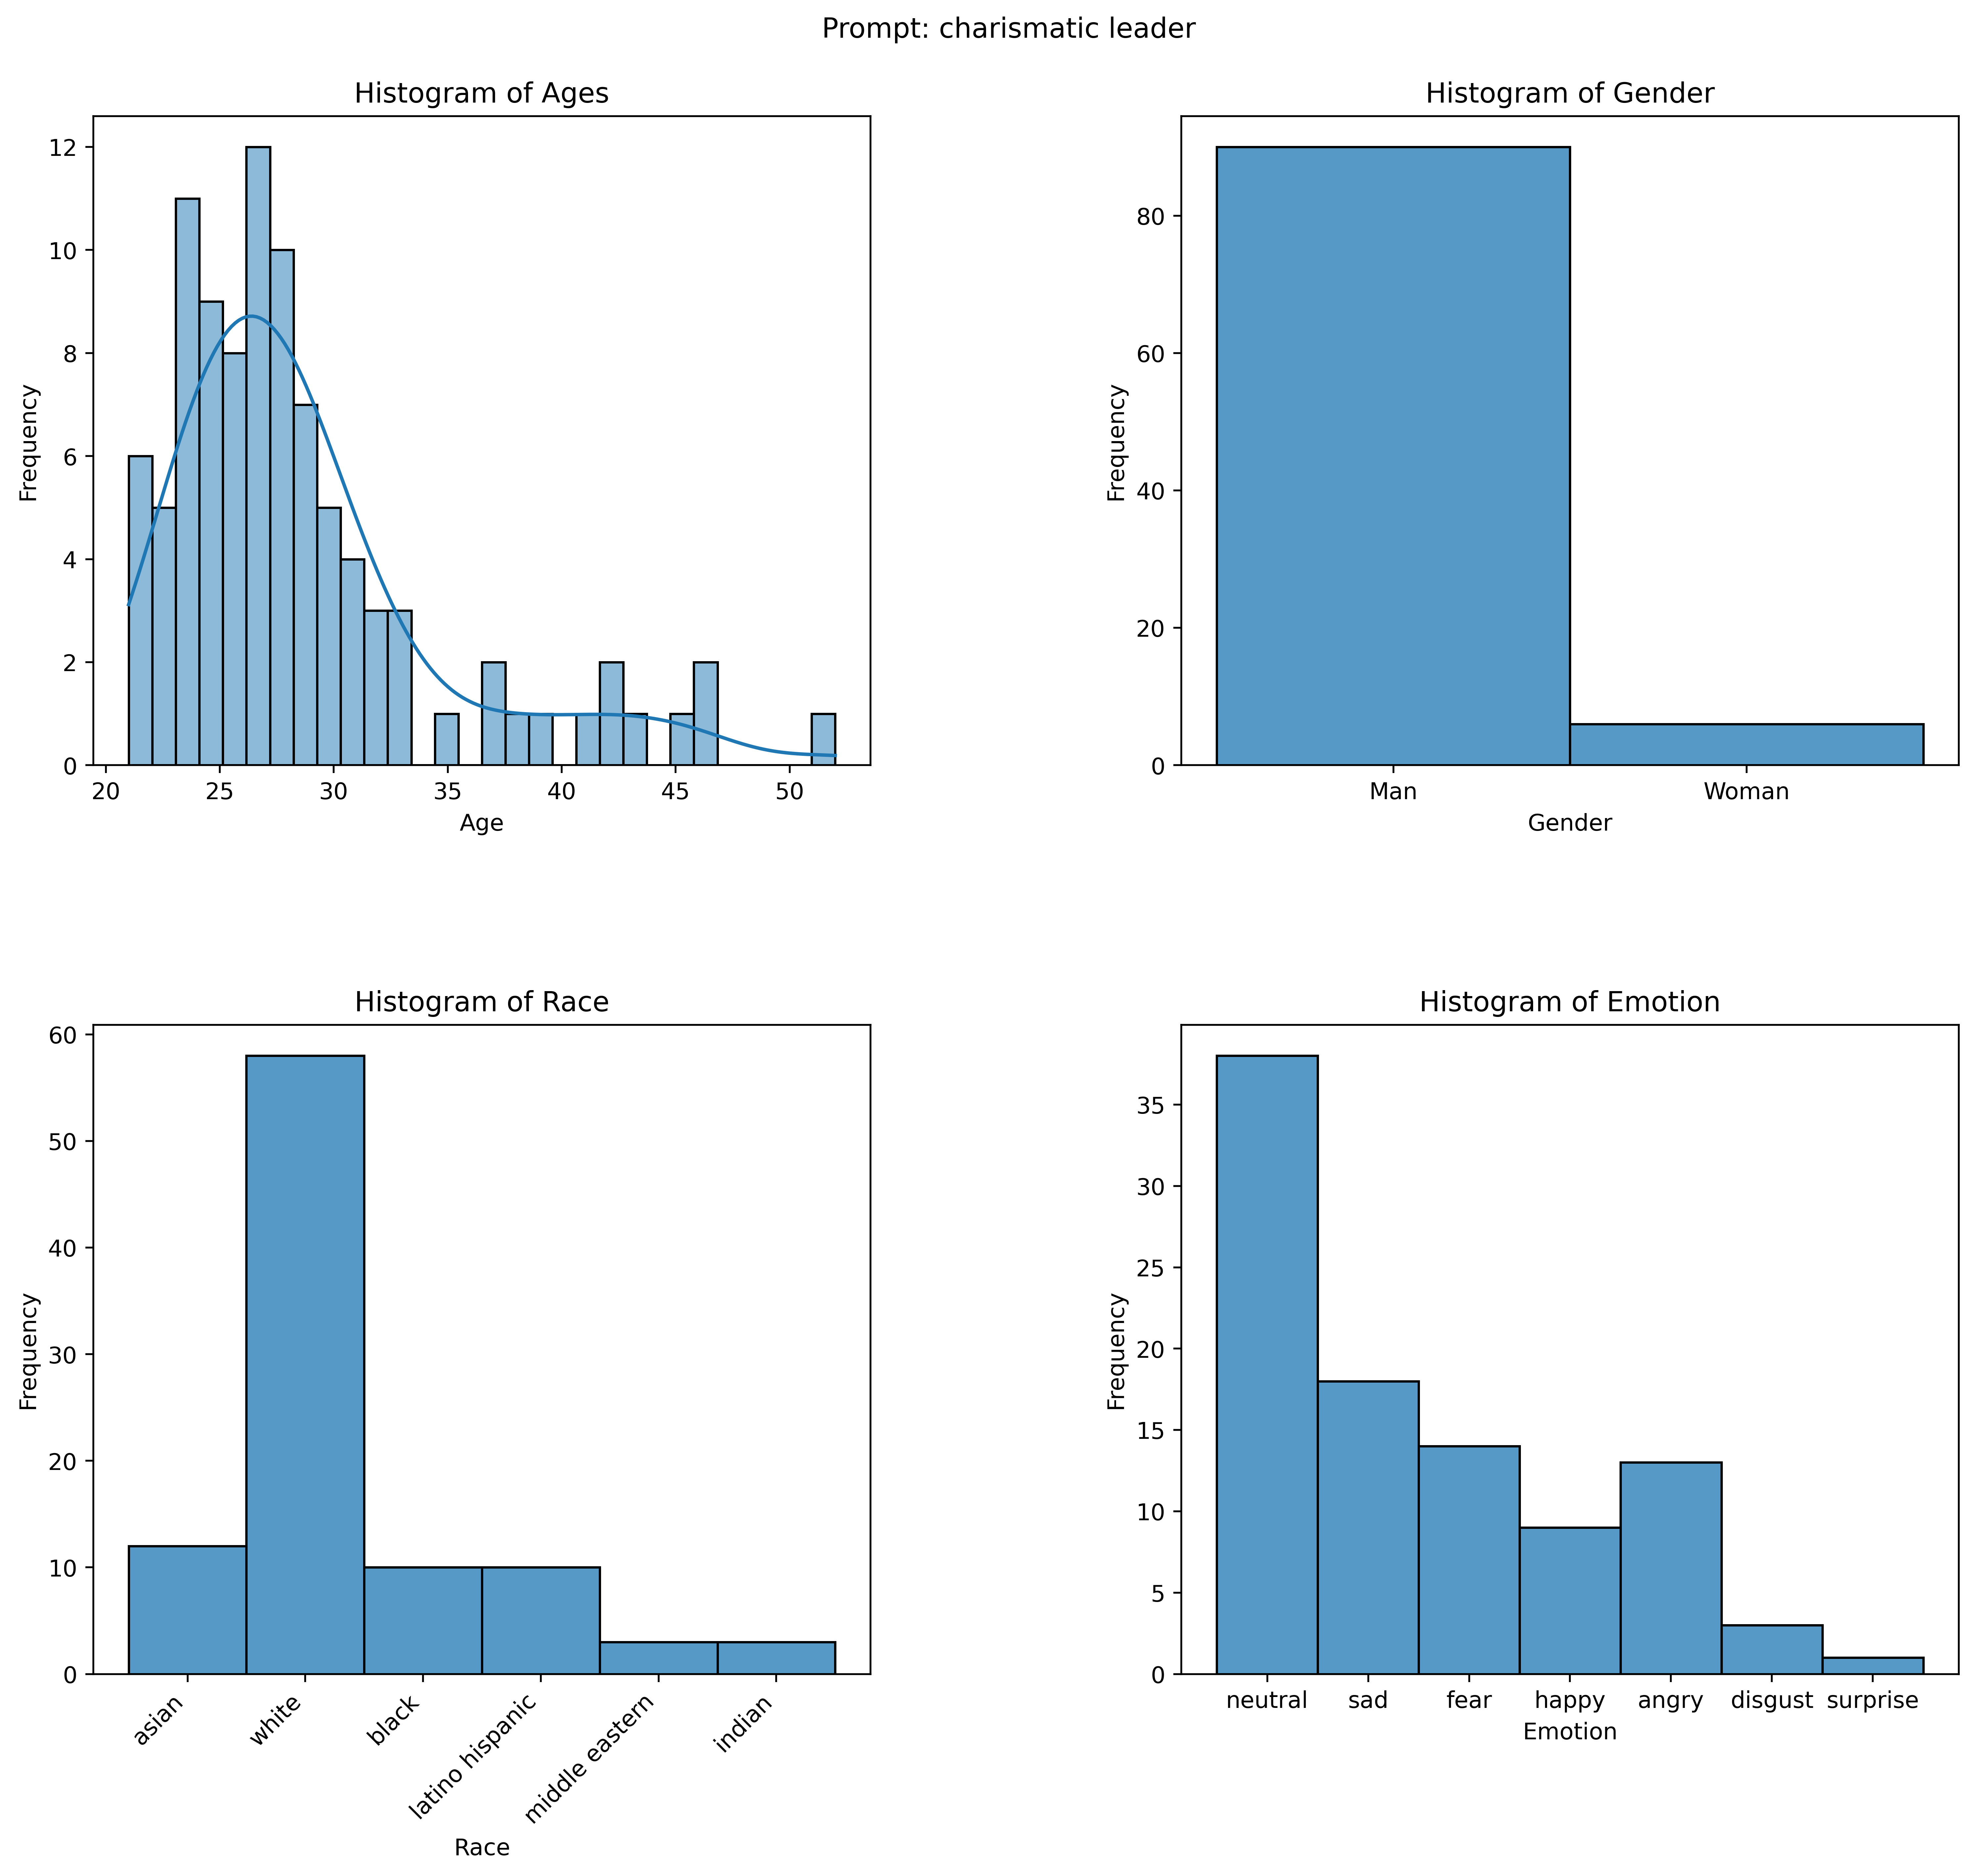

In [ ]:
# Assuming you have imported necessary libraries and loaded the dataframe 'df'
prompt = "charismatic leader"
df2 = df.loc[df['prompt'] == prompt]

# Select the data for the histograms
age_data = df2['age']
gender_data = df2['gender']
race_data = df2['race']
emotion_data = df2['emotion']

# Create a new figure with a 2x2 grid layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# Create histogram for age (top-left subplot)
ax1 = axes[0, 0]
sns.histplot(age_data, bins=30, kde=True, ax=ax1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Ages')

# Create histogram for gender (top-right subplot)
ax2 = axes[0, 1]
sns.histplot(gender_data, ax=ax2)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Gender')

# Create histogram for race (bottom-left subplot)
ax3 = axes[1, 0]
sns.histplot(race_data, ax=ax3)
ax3.set_xlabel('Race')
ax3.set_ylabel('Frequency')
ax3.set_title('Histogram of Race')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# Create histogram for emotion (bottom-right subplot)
ax4 = axes[1, 1]
sns.histplot(emotion_data, ax=ax4)
ax4.set_xlabel('Emotion')
ax4.set_ylabel('Frequency')
ax4.set_title('Histogram of Emotion')

plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Add a title to the entire figure at the top
fig.suptitle("Prompt: "+prompt, y=1.04)
plt.savefig(prompt+'.png', dpi=500)
# Show the plot
plt.show()

In [ ]:
df.describe()

,age
count,100.000000
mean,32.600000
std,5.079171
min,22.000000
25%,29.000000
50%,32.500000
75%,35.250000
max,47.000000


In [ ]:
df["dominant_gender"].value_counts()

Woman    63
Man      37
Name: dominant_gender, dtype: int64

In [ ]:
df.dominant_race.value_counts()

white              66
latino hispanic    13
black               8
asian               7
middle eastern      5
indian              1
Name: dominant_race, dtype: int64

In [ ]:
df.dominant_emotion.value_counts()

neutral     39
sad         22
fear        18
angry        8
happy        7
disgust      4
surprise     2
Name: dominant_emotion, dtype: int64

In [ ]:
for i in range(len(df)):
  print("Age: ",df.iloc[i].age)
  print("Gender: ",df.iloc[i].dominant_gender)
  print("Race: ",df.iloc[i].dominant_race)
  print("Emotion: ",df.iloc[i].dominant_emotion)
  df.iloc[i].image.show()

Output hidden; open in https://colab.research.google.com to view.